In [1]:
import chess.pgn

def load_game_from_pgn(file_path: str, game_number: int = 0) -> chess.pgn.Game:
    """
    Load a specific game from a PGN file.

    :param file_path: Path to the PGN file.
    :param game_number: Index of the game to load (0 for the first game).
    :return: The game object.
    """
    with open(file_path, 'r') as pgn_file:
        for _ in range(game_number):
            chess.pgn.skip_game(pgn_file)

        game = chess.pgn.read_game(pgn_file)
        return game

def get_pgn_string(game: chess.pgn.Game) -> str:
    """
    Extract the PGN string from the game.

    :param game: The game object.
    :return: The PGN string of the game.
    """
    exporter = chess.pgn.StringExporter(headers=True, variations=True, comments=True)
    return game.accept(exporter)

# Path to your PGN file
pgn_file_path = 'lichess_db_standard_rated_2016-06.pgn'

# Load the first game (index 0) from the PGN file
game = load_game_from_pgn(pgn_file_path, 0)

# Get the PGN string of the game
pgn_string = get_pgn_string(game)

# Print the PGN string
print(pgn_string)


[Event "Rated Bullet game"]
[Site "https://lichess.org/BCsRv65B"]
[Date "????.??.??"]
[Round "?"]
[White "RonaldUlyssesSwanson"]
[Black "pablokosco"]
[Result "1-0"]
[UTCDate "2016.05.31"]
[UTCTime "22:00:00"]
[WhiteElo "1601"]
[BlackElo "1793"]
[WhiteRatingDiff "+16"]
[BlackRatingDiff "-17"]
[ECO "A02"]
[Opening "Bird Opening"]
[TimeControl "120+1"]
[Termination "Time forfeit"]

1. f4 d6 2. Nf3 Nc6 3. b3 Nf6 4. Bb2 e6 5. e3 Be7 6. Bd3 a6 7. O-O O-O 8. Qe1
d5 9. Nc3 b5 10. Ne2 Ne4 11. g4 Nb4 12. Bxe4 dxe4 13. Nfd4 f6 14. a3 Nd5 15.
Nc6 Qd7 16. Nxe7+ Qxe7 17. Qg3 f5 18. gxf5 exf5 19. Nd4 c5 20. Nc6 Qc7 21. Be5
Qf7 22. Bd6 Re8 23. Ne5 Qb7 24. Bxc5 Nf6 25. Bd4 Be6 26. Nc6 Nh5 27. Qg5 g6 28.
Ne5 Rad8 29. Nxg6 Rxd4 30. Qxh5 hxg6 31. Qxg6+ Kf8 32. Qf6+ Qf7 33. Qxf7+ Kxf7
34. exd4 Rd8 35. c3 a5 36. Rf2 b4 37. Rb1 bxa3 38. b4 a4 39. Ra1 a2 40. Rff1 a3
41. Rfc1 Bc4 42. Rc2 Ra8 43. Rcxa2 1-0


In [3]:
import chess.pgn
import matplotlib.pyplot as plt
from tqdm import tqdm
import os

def extract_elos_from_pgn(file_path: str):
    elos = []
    file_size = os.path.getsize(file_path)

    with open(file_path, 'r') as pgn_file:
        with tqdm(total=file_size, unit='B', unit_scale=True) as pbar:
            while True:
                start_position = pgn_file.tell()
                game = chess.pgn.read_game(pgn_file)
                if game is None:
                    break  # End of file

                end_position = pgn_file.tell()
                pbar.update(end_position - start_position)

                white_elo = game.headers.get('WhiteElo', None)
                black_elo = game.headers.get('BlackElo', None)

                if white_elo is not None and white_elo.isdigit():
                    elos.append(int(white_elo))
                if black_elo is not None and black_elo.isdigit():
                    elos.append(int(black_elo))

    return elos

def plot_elo_distribution(elos: list):
    plt.hist(elos, bins=20, color='blue', alpha=0.7)
    plt.title('Distribution of ELO Ratings')
    plt.xlabel('ELO Rating')
    plt.ylabel('Frequency')
    plt.show()

# Path to your PGN file
pgn_file_path = 'lichess_db_standard_rated_2016-06.pgn'

# Extract ELO ratings
elos = extract_elos_from_pgn(pgn_file_path)

# Plot the distribution
plot_elo_distribution(elos)


  0%|          | 33.3k/5.69G [00:00<4:53:00, 324kB/s]

  1%|          | 68.4M/5.69G [03:13<4:25:05, 353kB/s]


KeyboardInterrupt: 

In [7]:
import chess.pgn

def create_smaller_pgn(input_file_path: str, output_file_path: str, max_games: int):
    """
    Create a smaller PGN file with a specified number of games.

    :param input_file_path: Path to the original large PGN file.
    :param output_file_path: Path where the smaller PGN file will be saved.
    :param max_games: Maximum number of games to include in the smaller file.
    """
    with open(input_file_path, 'r') as input_file, open(output_file_path, 'w') as output_file:
        for _ in range(max_games):
            game = chess.pgn.read_game(input_file)
            if game is None:
                break  # End of file reached
            output_file.write(str(game) + "\n\n")

# Paths for the input and output files
input_pgn_file_path = 'lichess_db_standard_rated_2016-06.pgn'
output_pgn_file_path = 'smaller_pgn_file.pgn'

# Create a smaller PGN file with the first 10,000 games
create_smaller_pgn(input_pgn_file_path, output_pgn_file_path, 1000)

print("Smaller PGN file created with 10,000 games.")


Smaller PGN file created with 10,000 games.


In [11]:
import re
import os
from tqdm import tqdm

def find_games_and_elos(file_path: str, max_games: int = None):
    """
    Extract games and ELO ratings using regex.

    :param file_path: Path to the PGN file.
    :param max_games: Maximum number of games to process (None for all).
    :return: List of ELO ratings.
    """
    game_pattern = re.compile(r'\[WhiteElo "(\d+)"\]\s*\[BlackElo "(\d+)"\]')
    elos = []

    with open(file_path, 'rb') as file:
        file_size = os.path.getsize(file_path)
        chunk_size = 1024 * 1024  # 1 MB chunks

        for _ in tqdm(range(0, file_size, chunk_size), total=file_size // chunk_size):
            chunk = file.read(chunk_size).decode('utf-8', errors='ignore')
            matches = game_pattern.findall(chunk)
            for white_elo, black_elo in matches:
                elos.extend([int(white_elo), int(black_elo)])
                if max_games and len(elos) // 2 >= max_games:
                    return elos[:max_games * 2]

    return elos

# Path to your PGN file
pgn_file_path = 'lichess_db_standard_rated_2016-06.pgn'

# Find games and ELOs, modify max_games as needed
elos = find_games_and_elos(pgn_file_path, max_games=10000000)

print(f"Extracted ELOs for {len(elos)//2} games.")


5425it [00:12, 421.72it/s]                          

Extracted ELOs for 6136221 games.


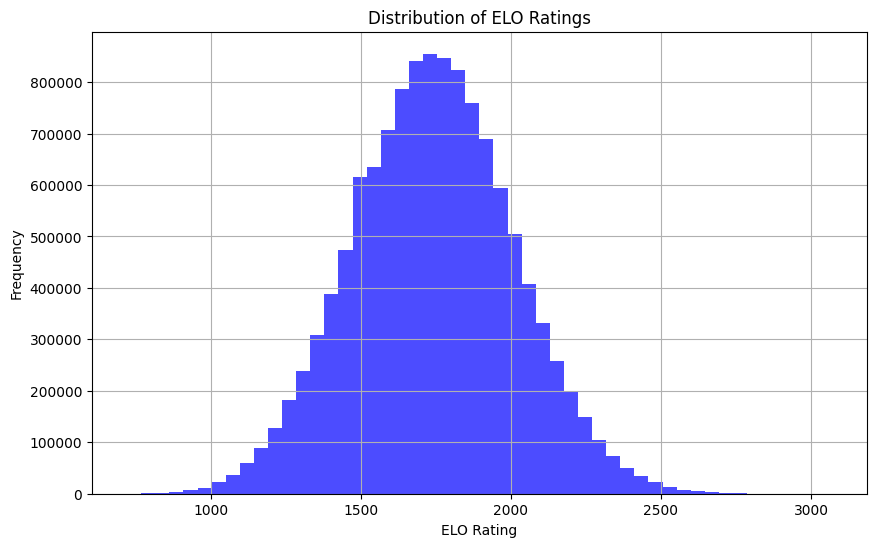

In [12]:
import matplotlib.pyplot as plt

def plot_elo_distribution(elos: list):
    """
    Plot the distribution of ELO ratings.

    :param elos: List of ELO ratings.
    """
    plt.figure(figsize=(10, 6))
    plt.hist(elos, bins=50, color='blue', alpha=0.7)
    plt.title('Distribution of ELO Ratings')
    plt.xlabel('ELO Rating')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

# Assuming elos is the list of ELO ratings you obtained
plot_elo_distribution(elos)


In [17]:
import chess.pgn
import csv
import re
import os
from tqdm import tqdm

def write_pgn_to_csv(pgn_file_path: str, csv_file_path: str, total_games_estimate: int):
    """
    Extract White ELO, Black ELO, and PGN string from a .pgn file, transform the PGN string,
    and store them in a CSV file.

    :param pgn_file_path: Path to the .pgn file.
    :param csv_file_path: Path to the output CSV file.
    :param total_games_estimate: Estimated total number of games in the PGN file.
    """
    with open(pgn_file_path, "r") as pgn_file, open(
        csv_file_path, "w", newline="", encoding="utf-8"
    ) as csv_file:
        writer = csv.writer(csv_file)
        writer.writerow(["WhiteELO", "BlackELO", "PGN"])

        pbar = tqdm(total=total_games_estimate, desc="Processing games")
        while True:
            game = chess.pgn.read_game(pgn_file)
            if game is None:
                break  # End of file reached

            white_elo = game.headers.get("WhiteElo", "NA")
            black_elo = game.headers.get("BlackElo", "NA")
            result = game.headers.get("Result", "NA")

            # Extracting the game moves and transforming the format
            game_moves = game.board().variation_san(game.mainline_moves())
            if len(game_moves) < 150:
                pbar.update(1)
                continue
            transformed_game_moves = re.sub(r"(\d+)\.\s+", r"\1.", game_moves)

            writer.writerow([white_elo, black_elo, result, transformed_game_moves])
            pbar.update(1)
        pbar.close()

# Path to your PGN file and output CSV file
# pgn_file_path = "lichess_db_standard_rated_2016-06.pgn"
pgn_file_path = 'smaller_pgn_file.pgn'
csv_file_path = "output.csv"

# Estimated total number of games based on file size
total_games_estimate = int(os.path.getsize(pgn_file_path) / (6.4 * 1024**3) * 6100000)


write_pgn_to_csv(pgn_file_path, csv_file_path, total_games_estimate)


Processing games: 1000it [00:05, 193.77it/s]                        


In [6]:
# Refined function for manual parsing to correctly extract only the required information
def refined_parse_pgn_to_csv(pgn_file_path: str, csv_file_path: str):
    with open(pgn_file_path, "r", encoding="utf-8") as pgn_file, \
         open(csv_file_path, "w", newline="", encoding="utf-8") as csv_file:
        writer = csv.writer(csv_file)
        writer.writerow(["WhiteElo", "BlackElo", "Result", "transcript"])

        white_elo, black_elo, result, game_moves = '', '', '', ''
        reading_moves = False

        for line in pgn_file:
            if line.startswith('[WhiteElo "'):
                white_elo = line.split('"')[1]
            elif line.startswith('[BlackElo "'):
                black_elo = line.split('"')[1]
            elif line.startswith('[Result "'):
                result = line.split('"')[1]
            elif line.strip() == '':
                if reading_moves and game_moves.strip():
                    # Process game moves
                    transformed_game_moves = re.sub(r"(\d+)\.\s+", r"\1.", game_moves.strip())
                    writer.writerow([white_elo, black_elo, result, transformed_game_moves])
                    white_elo, black_elo, result, game_moves = '', '', '', ''
                    reading_moves = False
            elif not line.startswith('[') and reading_moves:
                game_moves += line
            elif line.startswith('1. '):
                reading_moves = True
                game_moves = line

# File paths for refined parsing
csv_file_path_refined = pgn_file_path.replace(".pgn", "_refined.csv")

# Process the PGN file with the refined parsing function
refined_parse_pgn_to_csv(pgn_file_path, csv_file_path_refined)

# Read the first few lines of the generated CSV to verify
with open(csv_file_path_refined, "r") as csv_file:
    preview_refined = [next(csv_file) for _ in range(5)]
preview_refined


['WhiteElo,BlackElo,Result,transcript\n',
 '1601,1793,1-0,1.f4 d6 2.Nf3 Nc6 3.b3 Nf6 4.Bb2 e6 5.e3 Be7 6.Bd3 a6 7.O-O O-O 8.Qe1 d5 9.Nc3 b5 10.Ne2 Ne4 11.g4 Nb4 12.Bxe4 dxe4 13.Nfd4 f6 14.a3 Nd5 15.Nc6 Qd7 16.Nxe7+ Qxe7 17.Qg3 f5 18.gxf5 exf5 19.Nd4 c5 20.Nc6 Qc7 21.Be5 Qf7 22.Bd6 Re8 23.Ne5 Qb7 24.Bxc5 Nf6 25.Bd4 Be6 26.Nc6 Nh5 27.Qg5 g6 28.Ne5 Rad8 29.Nxg6 Rxd4 30.Qxh5 hxg6 31.Qxg6+ Kf8 32.Qf6+ Qf7 33.Qxf7+ Kxf7 34.exd4 Rd8 35.c3 a5 36.Rf2 b4 37.Rb1 bxa3 38.b4 a4 39.Ra1 a2 40.Rff1 a3 41.Rfc1 Bc4 42.Rc2 Ra8 43.Rcxa2 1-0\n',
 '1532,1541,0-1,1.e4 e5 2.Nf3 Nc6 3.d4 exd4 4.Nxd4 Nxd4 5.Qxd4 d6 6.Nc3 h6 7.e5 Be7 8.exd6 Bxd6 9.Qxg7 Qe7+ 10.Be2 Be5 11.Nd5 Bxg7 12.Nxe7 Nxe7 13.O-O Be6 14.Re1 O-O-O 15.c4 Kb8 16.c5 Bd4 17.Be3 Bxb2 18.Rab1 Bf6 19.c6 Nxc6 20.Bf3 Bd5 21.Bxd5 Rxd5 22.a4 Rhd8 23.Bxh6 Bc3 24.Rec1 Bd2 25.Bxd2 Rxd2 26.h3 Ne5 27.Kh2 Rxf2 28.Rd1 Rxd1 29.Rxd1 b6 30.Rd8+ Kb7 31.Re8 f6 32.Kg3 Ra2 33.Rf8 Nd7 34.Rf7 Kc6 35.h4 Rxa4 36.h5 Ne5 37.h6 Nxf7 38.h7 Rb4 39.Kh3 a5 40.g4 a4 41.Kh4 a3 42.

In [7]:
import pandas as pd

df = pd.read_csv('lichess_db_standard_rated_2017-05.csv')

print(len(df))

10829490
